In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
from __future__ import unicode_literals

import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Introduction

On fait des plots sur les runs

In [2]:
from workflow import print

# Data

In [3]:
from data import load_data

In [4]:
X, y = load_data()

# Load models

In [5]:
from workflow import get_save_directory

In [6]:
def load_models(get_model, *args, **kwargs):
    models = []
    for i in range(5):
        model = get_model(*args, **kwargs)
        save_directory = get_save_directory()
        model_name = '{}-{}'.format(model.get_name(), i)
        path = os.path.join(save_directory, model_name)
        model.load(path)
        models.append(model)
    return models

In [7]:
from myNN import get_model as get_model_NN
from myNNDA import get_model as get_model_NNDA
from myTP import get_model as get_model_TP
# from myPAN import get_model as get_model_PAN


# Test submission

In [8]:
from workflow import get_cv_iter
from preprocessing import skew
from sklearn.metrics import accuracy_score

def test_submission(models, X, y, z_list=(-45, 0, +45)):
    cv_iter = get_cv_iter(X, y)
    n_cv = len(cv_iter)
    df_list = []
    for i, (idx_dev, idx_valid) in enumerate(cv_iter):
        X_test = X[idx_valid]
        y_test = y[idx_valid]
        res = []
        model = models[i]
        print('testing model {}/{}'.format(i+1, n_cv))
        for z in z_list:
            X_t = skew(X_test, z=z)
            pred = model.predict(X_t)
            acc = accuracy_score(y_test, pred)
            res.append((z, acc))
        df = pd.DataFrame(res, columns=['z', 'accuracy'])
        df_list.append(df)
    print('Done.')
    return df_list



In [9]:
def get_mean_std(df_list):
    z = df_list[0]['z']
    acc = np.concatenate([df['accuracy'].values.reshape(-1, 1) for df in df_list], axis=1)
    mean_acc = np.mean(acc, axis=1)
    std_acc = np.std(acc, axis=1)
    return mean_acc, std_acc

In [21]:
NN_models = load_models(get_model_NN, cuda=False)
z_list = list(range(-5, 5, 1))
df_list = test_submission(NN_models, X, y, z_list=z_list)
NN_mean_acc, NN_std_acc = get_mean_std(df_list)


2017-11-16 15:24:50 testing model 1/5


/home/estrade/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator StandardScaler from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


2017-11-16 15:25:05 testing model 2/5
2017-11-16 15:25:19 testing model 3/5
2017-11-16 15:25:34 testing model 4/5
2017-11-16 15:25:49 testing model 5/5
2017-11-16 15:26:02 Done.


In [22]:
NNDA_models = load_models(get_model_NNDA, width=None, cuda=False)
z_list = list(range(-5, 5, 1))
# z_list = list(range(-50, 51, 10))
df_list = test_submission(NNDA_models, X, y, z_list=z_list)
NNDA_mean_acc, NNDA_std_acc = get_mean_std(df_list)


2017-11-16 15:26:02 testing model 1/5


/home/estrade/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator StandardScaler from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


2017-11-16 15:26:16 testing model 2/5
2017-11-16 15:26:31 testing model 3/5
2017-11-16 15:26:46 testing model 4/5
2017-11-16 15:27:01 testing model 5/5
2017-11-16 15:27:16 Done.


In [23]:
TP_models = load_models(get_model_TP, trade_of=10.0, cuda=False)
z_list = list(range(-5, 5, 1))
# z_list = list(range(-50, 51, 10))
df_list = test_submission(TP_models, X, y, z_list=z_list)
TP_mean_acc, TP_std_acc = get_mean_std(df_list)


2017-11-16 15:27:16 testing model 1/5


/home/estrade/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator StandardScaler from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


2017-11-16 15:27:33 testing model 2/5
2017-11-16 15:27:48 testing model 3/5
2017-11-16 15:28:04 testing model 4/5
2017-11-16 15:28:20 testing model 5/5
2017-11-16 15:28:37 Done.


In [24]:
# PAN_models = load_models(get_model_PAN)
# z_list = list(range(-50, 51, 10))
# df_list = test_submission(PAN_models, X, y, z_list=z_list)
# PAN_mean_acc, PAN_std_acc = get_mean_std(df_list)


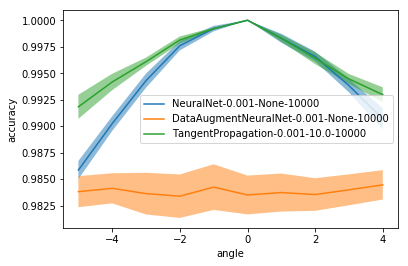

In [25]:
z = z_list

plt.plot(z, NN_mean_acc, label=NN_models[0].get_name())
plt.fill_between(z, NN_mean_acc+NN_std_acc, NN_mean_acc-NN_std_acc, alpha=0.5)

plt.plot(z, NNDA_mean_acc, label=NNDA_models[0].get_name())
plt.fill_between(z, NNDA_mean_acc+NNDA_std_acc, NNDA_mean_acc-NNDA_std_acc, alpha=0.5)

plt.plot(z, TP_mean_acc, label=TP_models[0].get_name())
plt.fill_between(z, TP_mean_acc+TP_std_acc, TP_mean_acc-TP_std_acc, alpha=0.5)

# plt.plot(z, PAN_mean_acc, label=PAN_models[0].get_name())
# plt.fill_between(z, PAN_mean_acc+PAN_std_acc, PAN_mean_acc-PAN_std_acc, alpha=0.5)

plt.xlabel('angle')
plt.ylabel('accuracy')
plt.legend()
plt.show()


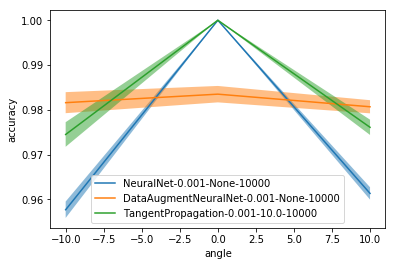

In [20]:
z = z_list
sli = slice(4,7)

plt.plot(z[sli], NN_mean_acc[sli], label=NN_models[0].get_name())
plt.fill_between(z[sli], NN_mean_acc[sli]+NN_std_acc[sli], NN_mean_acc[sli]-NN_std_acc[sli], alpha=0.5)

plt.plot(z[sli], NNDA_mean_acc[sli], label=NNDA_models[0].get_name())
plt.fill_between(z[sli], NNDA_mean_acc[sli]+NNDA_std_acc[sli], NNDA_mean_acc[sli]-NNDA_std_acc[sli], alpha=0.5)

plt.plot(z[sli], TP_mean_acc[sli], label=TP_models[0].get_name())
plt.fill_between(z[sli], TP_mean_acc[sli]+TP_std_acc[sli], TP_mean_acc[sli]-TP_std_acc[sli], alpha=0.5)

# plt.plot(z, PAN_mean_acc, label=PAN_models[0].get_name())
# plt.fill_between(z, PAN_mean_acc+PAN_std_acc, PAN_mean_acc-PAN_std_acc, alpha=0.5)

plt.xlabel('angle')
plt.ylabel('accuracy')
plt.legend()
plt.show()


## Playground

In [ ]:
# i = 0
# m = models[i]
# cv_iter = get_cv_iter(X, y)
# idx_dev, idx_valid = cv_iter[i]
# X_test = X[idx_valid]
# y_test = y[idx_valid]
# acc = accuracy_score(y_test, m.predict(X_test))

# print(acc)


In [ ]:
# XX = skew(X_test, z=80)
# y_pred = m.predict(XX)
# acc = accuracy_score(y_test, m.predict(XX))
# print(acc)

# i = np.random.randint(0, XX.shape[0])
# plt.imshow(XX[i].reshape(28,28))

# plt.title('label = {}<->truth = {}'.format(y_pred[i], y_test[i]))
# plt.show()

# plt.imshow(X_test[i].reshape(28,28))
# plt.show()


In [ ]:
# X_test.shape

In [ ]:
from myNNDA import data_augment

In [ ]:
XX = X[:200]
yy = y[:200]
XX2, yy, _ = data_augment(XX, yy, None)

In [ ]:
i = 67
x = XX2[i].reshape(28, 28)
plt.imshow(x, cmap='Greys')
plt.title('skewed')
plt.show()
x = XX[i].reshape(28, 28)
plt.imshow(x, cmap='Greys')
plt.title('original')
plt.show()